# <h1 style="padding:10px; background-color:#0f4c5c; margin:0; color:white; font-family:newtimeroman; font-size:300%; text-align:center;border-radius: 25px 25px; overflow:hidden; font-weight:500">Estudo Seaborn<br></h1>

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Estudo Básico / Projeto </h1>

Nosso projeto se trata de gorjetas, e sabemos que no Brasil as pessoas pagam 10% do valor da conta como gorjeta ou caixinha dos funcionários, de forma opcional. Em outros países, este valor é livre e fica a critério do cliente, ou seja, não há uma porcentagem exata estabelecida.

In [65]:
import pandas as pd
import seaborn as sns

In [66]:
dados = pd.read_csv('dados/tips_atualizado.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


### traduzindo colunas

In [67]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [68]:
renomear = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
}

In [69]:
gorjeta = dados.rename(columns= renomear)

In [70]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [71]:
gorjeta.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [72]:
sim_nao = {'No': 'Não', 'Yes': 'Sim'}

In [73]:
gorjeta.sobremesa = gorjeta.sobremesa.map(sim_nao)

In [74]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [75]:
gorjeta.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [76]:
dia_da_semana = {
    'Sun': 'Dom',
    'Sat': 'Sab',
    'Thur': 'Qui',
    'Fri': 'Sex'
}

In [77]:
gorjeta.dia_da_semana = gorjeta.dia_da_semana.map(dia_da_semana)

In [78]:
gorjeta.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [79]:
hora_do_dia={'Dinner': 'Jantar', 'Lunch': 'Almoco'}

In [80]:
gorjeta.hora_do_dia = gorjeta.hora_do_dia.map(hora_do_dia)

In [81]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Dom,Jantar,2


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Explorando os Dados </h1>

seaborn: statistical data visualization 

url: https://seaborn.pydata.org/

In [82]:
import seaborn as sns

In [83]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Dom,Jantar,2


In [84]:
shape = gorjeta.shape

print(f'A base de dados contém {shape[0]} registros\n')
print(f'Registros não nulos:')
gorjeta.isnull().sum()

A base de dados contém 3416 registros

Registros não nulos:


valor_da_conta      0
gorjeta             0
sobremesa           0
dia_da_semana       0
hora_do_dia         0
total_de_pessoas    0
dtype: int64

In [86]:
gorjeta.shape

(3416, 6)

In [87]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Dom,Jantar,2


In [88]:
gorjeta['porcentagem'] = gorjeta['gorjeta'] / gorjeta.valor_da_conta

In [89]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059447


In [90]:
gorjeta.porcentagem = gorjeta.porcentagem.round(2)

In [91]:
gorjeta.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Análise 1 - Valor de Conta e Gorjeta </h1>

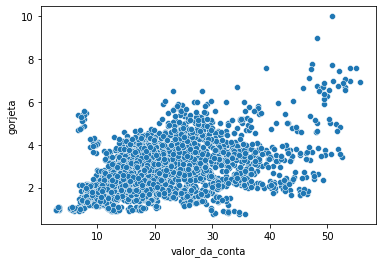

In [92]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data= gorjeta)


**Visualmente o valor da gorjeta aumenta com fome o valor da conta**

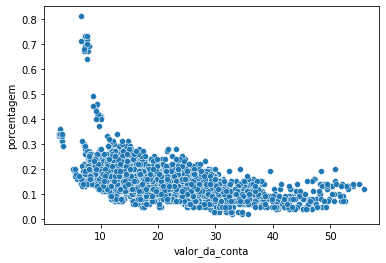

In [93]:
porcentagem_conta = sns.scatterplot(data= gorjeta, x= 'valor_da_conta', y= 'porcentagem')

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

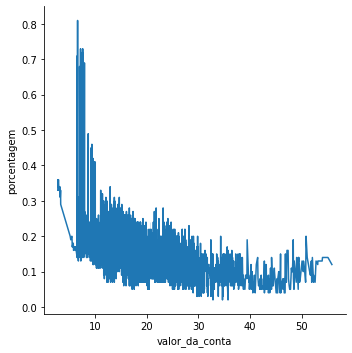

In [94]:
sns.relplot(data= gorjeta, x= 'valor_da_conta', y= 'porcentagem', kind= 'line')

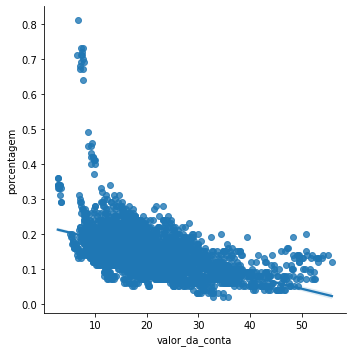

In [95]:
sns.lmplot(data= gorjeta, x= 'valor_da_conta', y= 'porcentagem')

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Análise 2 - Sobremesa </h1>

In [96]:
gorjeta.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17


In [97]:
gorjeta[gorjeta.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [98]:
gorjeta[gorjeta.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


### Análise Visual

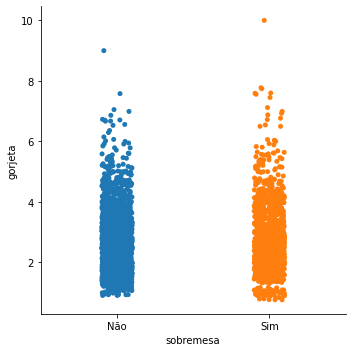

In [99]:
sns.catplot(data= gorjeta, x='sobremesa', y='gorjeta')

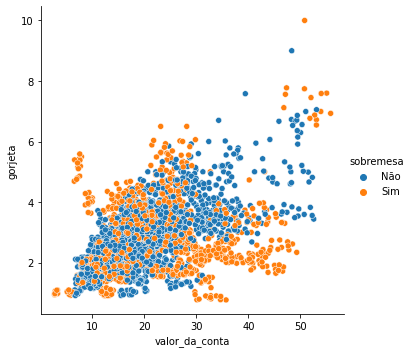

In [100]:
sns.relplot(data= gorjeta, x='valor_da_conta', y='gorjeta', hue= 'sobremesa')

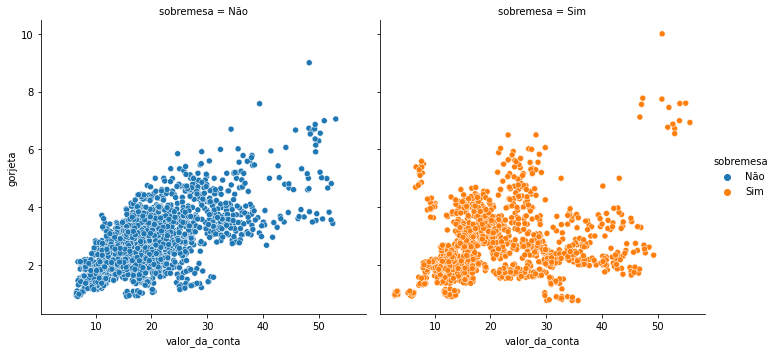

In [101]:
sns.relplot(
    data= gorjeta,
    x='valor_da_conta',
    y='gorjeta',
    hue= 'sobremesa',
    col= 'sobremesa'
)

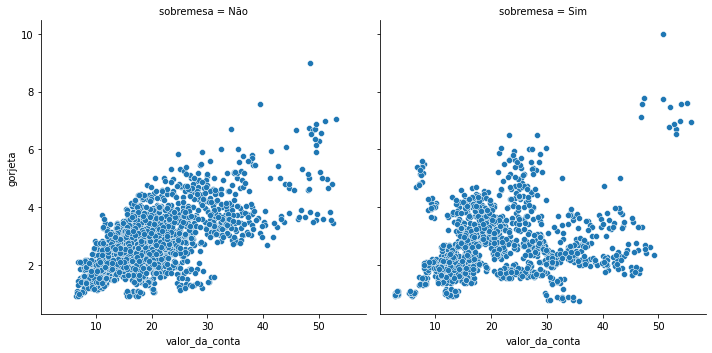

In [102]:
sns.relplot(
    data= gorjeta,
    x='valor_da_conta',
    y='gorjeta',
    col= 'sobremesa'
)

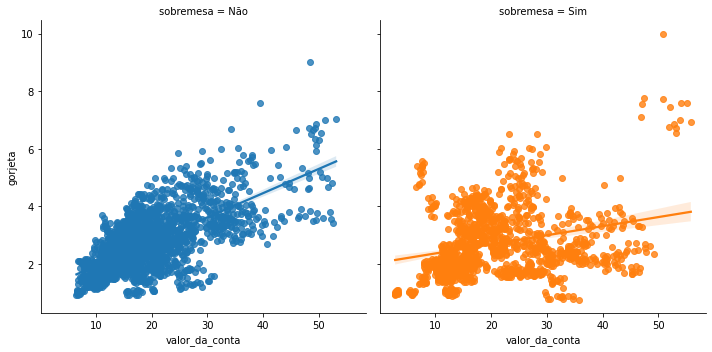

In [103]:
sns.lmplot(
    data= gorjeta,
    x='valor_da_conta',
    y='gorjeta',
    hue= 'sobremesa',
    col= 'sobremesa'
)

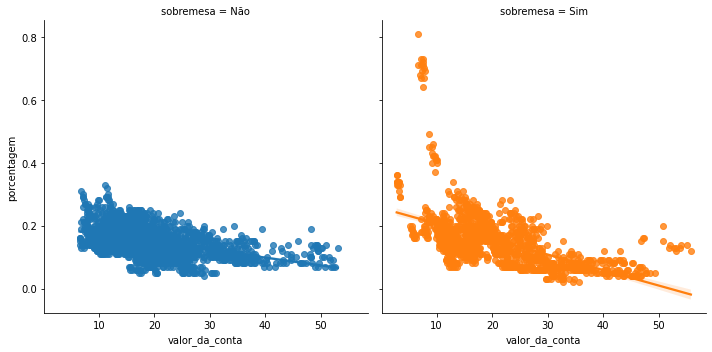

In [104]:
sns.lmplot(
    data= gorjeta,
    x='valor_da_conta',
    y='porcentagem',    # add porcentagem
    hue= 'sobremesa',
    col= 'sobremesa'
)

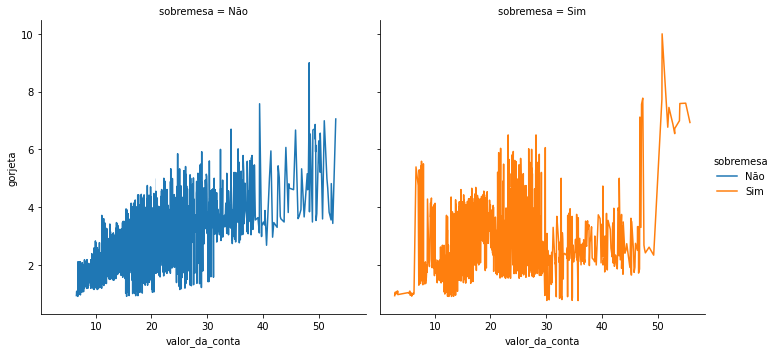

In [105]:
sns.relplot(
    data= gorjeta,
    x='valor_da_conta',
    y='gorjeta',
    hue= 'sobremesa',
    col= 'sobremesa',
    kind= 'line'
)

**Visualmente, existe diferença no valor da gorjeta daqueles que pediram ou não sobremesa**

### Teste de Hipótese

**H<sup>null</sup>**

> A distribuição da taxa da gorjeta é a mesma nos dois grupos

**H<sup>alt</sup>**
> A distribuição da taxa da gorjeta não é a mesma nos dois grupos

In [106]:
from scipy.stats import ranksums

In [107]:
sobremesa = gorjeta.query('sobremesa == "Sim"').porcentagem

In [108]:
sem_sobremesa = gorjeta.query('sobremesa == "Não"').porcentagem

In [109]:
r = ranksums(sobremesa, sem_sobremesa)
r

RanksumsResult(statistic=-2.130334422180308, pvalue=0.033144013617673405)

In [110]:
print(f'O valor de pvalue: {r.pvalue}')

O valor de pvalue: 0.033144013617673405


> Observação da análise com dados `antigos`:
<br>Como o valor de pvalue foi aproximadamente 0.52, podemos falar que a hipótese é nula, ou seja, a distribuição da taxa da gorjeta é a mesma nos dois grupos

> Observação da análise com dados **`Atuais`**:
<br>
<br> >Como p-value é maior que 0.05 entáo a hipótese é:
> 
> **H<sup>null</sup>**
> <br>A distribuição do valor da conta é igual no almoço e no jantar

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Análise 3 - Dia da Semana </h1>

In [111]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06


In [112]:
gorjeta.dia_da_semana.unique()

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

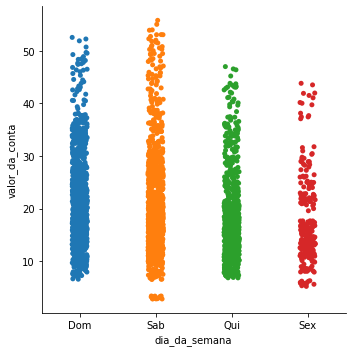

In [113]:
sns.catplot(
    data= gorjeta,
    x= 'dia_da_semana',
    y = 'valor_da_conta'
)

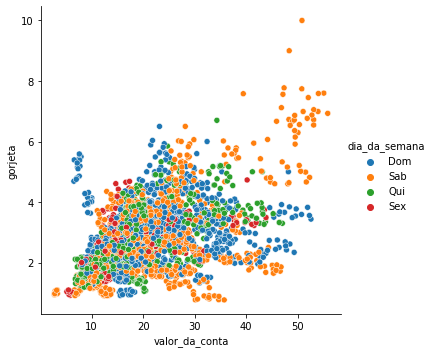

In [114]:
sns.relplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'gorjeta',
    hue= 'dia_da_semana'
)

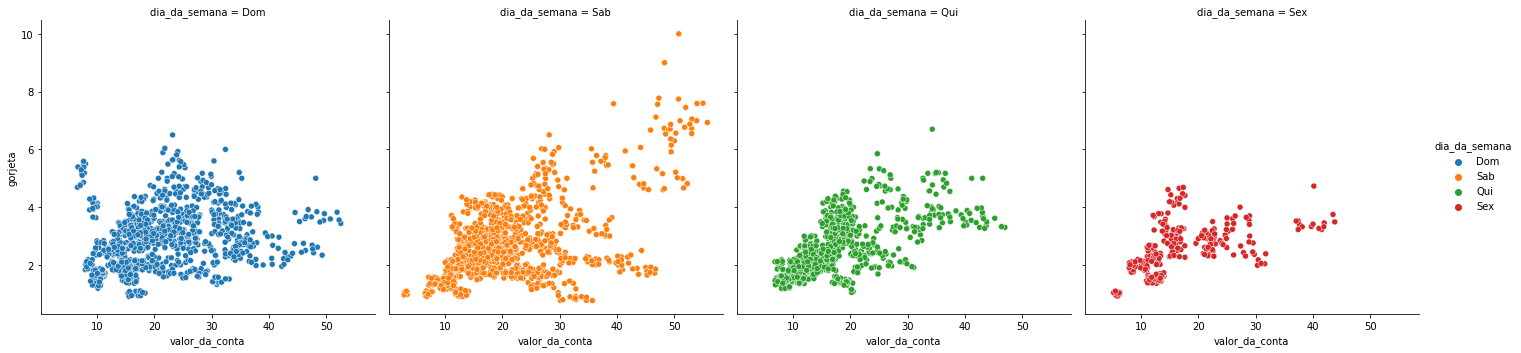

In [115]:
sns.relplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'gorjeta',
    hue= 'dia_da_semana',
    col= 'dia_da_semana'
)

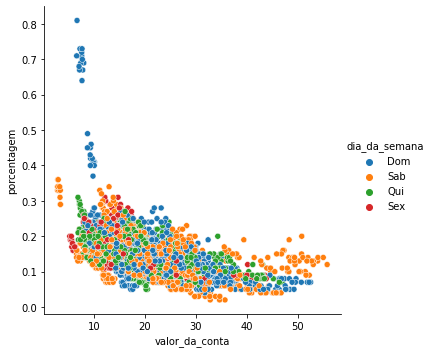

In [116]:
sns.relplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'porcentagem',
    hue= 'dia_da_semana'
)

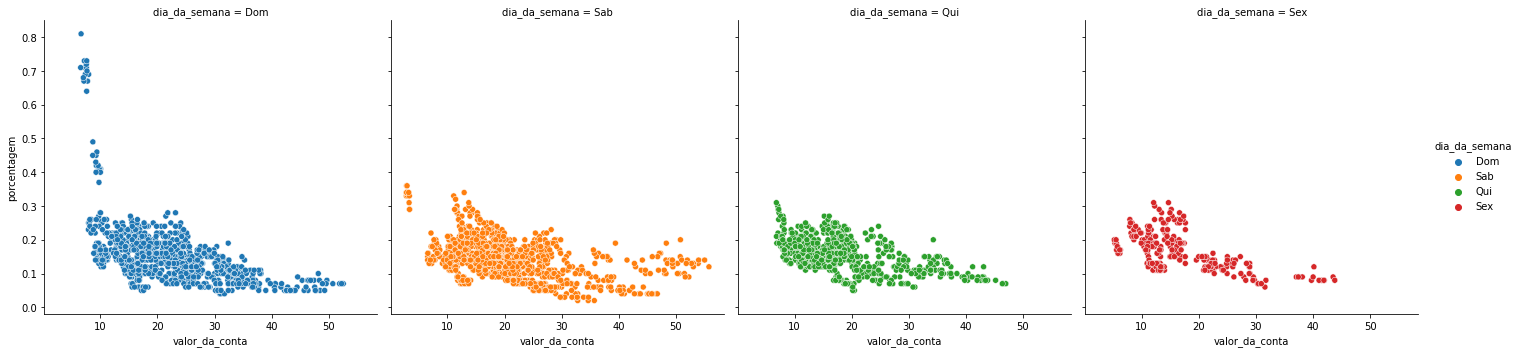

In [117]:
sns.relplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'porcentagem',
    hue= 'dia_da_semana',
    col= 'dia_da_semana'
)

lmplot <hr>

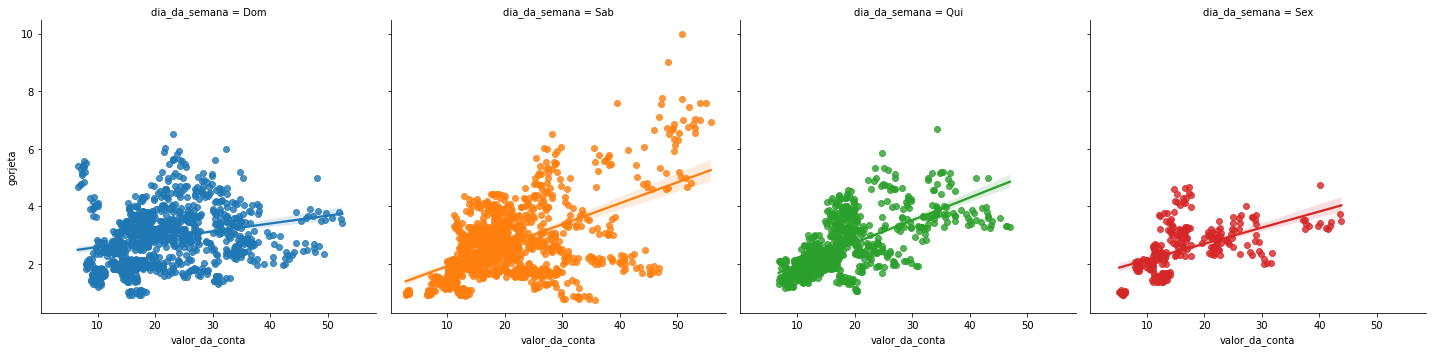

In [118]:
sns.lmplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'gorjeta',
    hue= 'dia_da_semana',
    col= 'dia_da_semana'
)

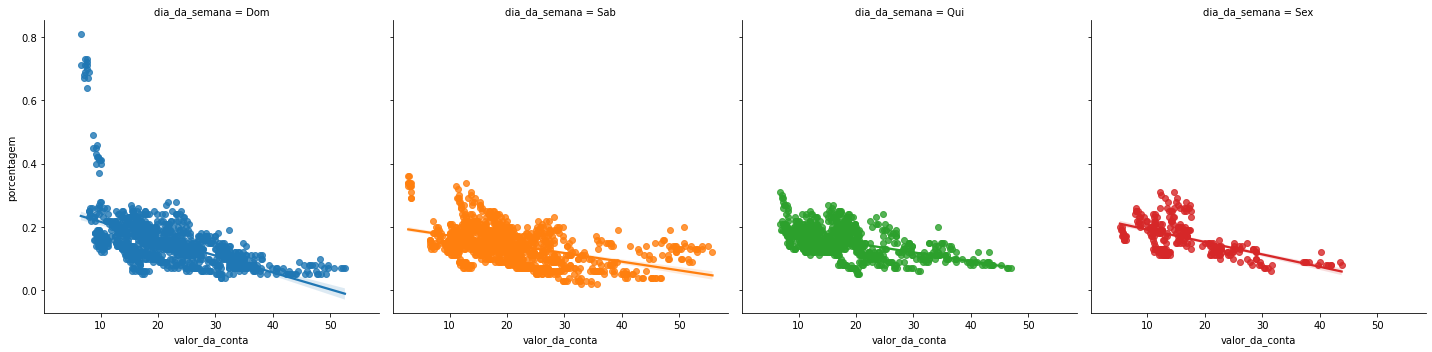

In [119]:
sns.lmplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'porcentagem',
    hue= 'dia_da_semana',
    col= 'dia_da_semana'
)

### Análise Descritiva <hr>

In [120]:
media_geral_gorjeta = gorjeta.gorjeta.mean()

In [121]:
print(f'A média geral: {media_geral_gorjeta}')

A média geral: 2.711189214091612


In [122]:
gorjeta_media = gorjeta.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]
gorjeta_media

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Dom,21.439133,2.902079,0.154953
Qui,17.724088,2.556177,0.154090
Sab,20.480249,2.690114,0.143604
Sex,17.215616,2.549960,0.163158


In [123]:
print('Frequencia dos dias:')
gorjeta.dia_da_semana.value_counts()

Frequencia dos dias:


Sab    1218
Dom    1064
Qui     868
Sex     266
Name: dia_da_semana, dtype: int64

### Teste de Hipótese

**H<sup>null</sup>**
> A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>alt</sup>**
> A distribuição do valor da conta não é igual no sábado e no domingo

In [124]:
conta_dom = gorjeta.query('dia_da_semana == "Dom"').valor_da_conta
conta_sab = gorjeta.query('dia_da_semana == "Sab"').valor_da_conta

In [125]:
r2 = ranksums(conta_dom, conta_sab)

In [131]:
print(f'O valor do p-value: {r2.pvalue}')

O valor do p-value: 0.0004435935681441821


A distribuição do valor da conta **não é igual no sabádo e no domingo** ou seja:
> **H<sup>alt</sup>**
> <br>A distribuição do valor da conta não é igual no sábado e no domingo

In [132]:
conta_qui = gorjeta.query('dia_da_semana == "Qui"').valor_da_conta

In [133]:
r3 = ranksums(conta_qui, conta_sab)
print(f'O valor do p-value: {r3.pvalue}')

O valor do p-value: 2.873469664025779e-14


Rejeita a hipótese nula, adotando que a distribuição do valor da conta não é igual na quinta e no sábado para fins práticos

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Análise 4 - Hora do Dia </h1>

In [134]:
gorjeta.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17


C:\Users\ricar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ricar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


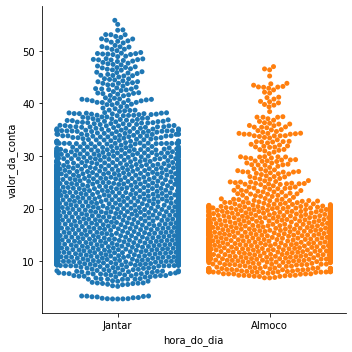

In [136]:
sns.catplot(
    data= gorjeta,
    x= 'hora_do_dia',
    y= 'valor_da_conta',
    kind= 'swarm'
)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

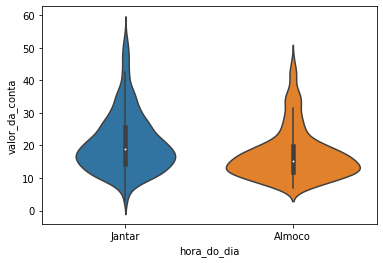

In [137]:
sns.violinplot(
    data= gorjeta,
    x= 'hora_do_dia',
    y= 'valor_da_conta',
)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

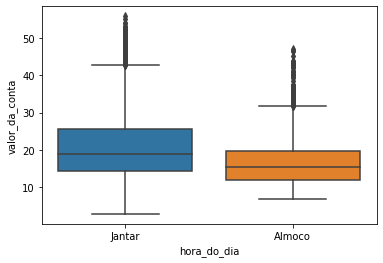

In [138]:
sns.boxplot(
    data= gorjeta,
    x= 'hora_do_dia',
    y= 'valor_da_conta',
)

In [139]:
gorjeta.hora_do_dia.value_counts()

Jantar    2464
Almoco     952
Name: hora_do_dia, dtype: int64

In [140]:
almoco = gorjeta.query('hora_do_dia == "Almoco"').valor_da_conta
jantar = gorjeta.query('hora_do_dia == "Jantar"').valor_da_conta

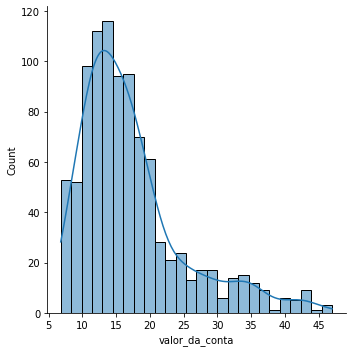

In [141]:
sns.displot(almoco, kde= True)

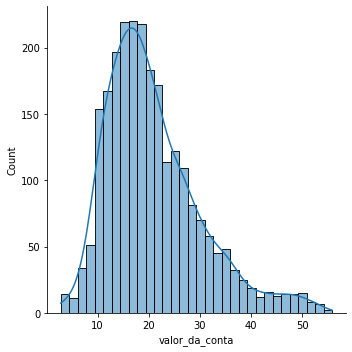

In [142]:
sns.displot(jantar, kde= True)

### Teste de Hipótese <hr>

In [143]:
gorjeta.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoco,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


**H<sup>null</sup>**
> A distribuição do valor da conta é igual no almoço e no jantar

**H<sup>alt</sup>**
> A distribuição do valor da conta não é igual no almoço e no jantar

In [144]:
r4 = ranksums(jantar, almoco)
print(f'O valor de p-value é: {r4.pvalue}')

O valor de p-value é: 5.169201062207143e-34


Como p-value é menor que 0.05 entáo a hipótese é:

**H<sup>alt</sup>**
> A distribuição do valor da conta não é igual no almoço e no jantar

In [145]:
per_almoco = gorjeta.query('hora_do_dia == "Almoco"').porcentagem
per_jantar = gorjeta.query('hora_do_dia == "Jantar"').porcentagem

In [146]:
r4 = ranksums(per_almoco, per_jantar)
print(f'O valor de p-value é: {r4.pvalue}')

O valor de p-value é: 1.3785725618355523e-11


Como p-value é maior que 0.05 entáo a hipótese é:

**H<sup>null</sup>**
> A distribuição do valor da conta é igual no almoço e no jantar